In [1]:
import pandas as pd
df = pd.read_csv('./中免.csv').drop(labels = 'Unnamed: 0',axis = 1)
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,601888.SH,20230619,129.50,129.73,126.76,127.30,130.16,-2.86,-2.1973,169945.93,2172702.862
1,601888.SH,20230616,130.50,131.00,127.28,130.16,130.00,0.16,0.1231,275685.71,3558988.188
2,601888.SH,20230615,121.38,130.90,120.20,130.00,121.13,8.87,7.3227,457500.11,5788862.155
3,601888.SH,20230614,121.47,124.31,120.33,121.13,120.80,0.33,0.2732,251451.67,3076538.873
4,601888.SH,20230613,119.50,121.20,118.60,120.80,120.01,0.79,0.6583,142710.83,1711753.043
...,...,...,...,...,...,...,...,...,...,...,...
1078,601888.SH,20190108,57.82,59.90,57.74,59.60,58.10,1.50,2.5818,61794.86,364318.263
1079,601888.SH,20190107,57.38,58.58,56.89,58.10,57.10,1.00,1.7513,85276.59,492006.161
1080,601888.SH,20190104,56.05,58.21,55.73,57.10,56.98,0.12,0.2106,106282.91,608741.716
1081,601888.SH,20190103,59.64,59.64,56.50,56.98,59.80,-2.82,-4.7157,112042.84,646870.459


In [2]:
df['trade_date'] = pd.to_datetime(df['trade_date'],format='%Y%m%d')
df.set_index('trade_date',inplace=True)
df.head()

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2023-06-19,601888.SH,129.50,129.73,126.76,127.30,130.16,-2.86,-2.1973,169945.93,2172702.862
2023-06-16,601888.SH,130.50,131.00,127.28,130.16,130.00,0.16,0.1231,275685.71,3558988.188
2023-06-15,601888.SH,121.38,130.90,120.20,130.00,121.13,8.87,7.3227,457500.11,5788862.155
2023-06-14,601888.SH,121.47,124.31,120.33,121.13,120.80,0.33,0.2732,251451.67,3076538.873
2023-06-13,601888.SH,119.50,121.20,118.60,120.80,120.01,0.79,0.6583,142710.83,1711753.043


In [3]:
ma5 = df['close'].rolling(5).mean()
ma30 = df['close'].rolling(30).mean()
ma30

trade_date
2023-06-19          NaN
2023-06-16          NaN
2023-06-15          NaN
2023-06-14          NaN
2023-06-13          NaN
                ...    
2019-01-08    59.325333
2019-01-07    59.103000
2019-01-04    58.908667
2019-01-03    58.724000
2019-01-02    58.635667
Name: close, Length: 1083, dtype: float64

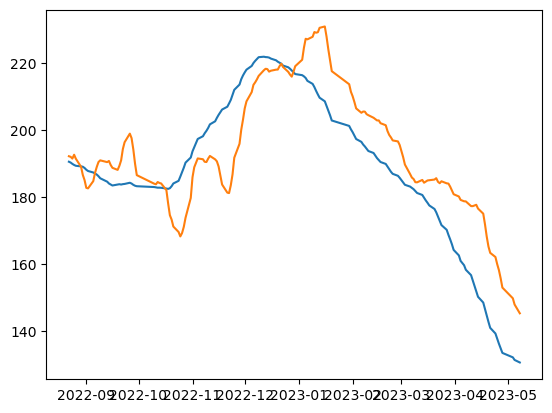

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(ma30[30:200])
plt.plot(ma5[30:200])

In [5]:
ma5 = ma5[30:200]
ma30 = ma30[30:200]
ma30
s1 = ma5 < ma30
s2 = ma5 > ma30
# s2 与 s1 相反
s2
df = df[30:200]
df
print(df)

              ts_code    open    high     low   close  pre_close  change  \
trade_date                                                                 
2023-05-08  601888.SH  152.50  152.50  148.11  149.86     152.88   -3.02   
2023-05-05  601888.SH  153.25  154.50  150.99  152.88     153.32   -0.44   
2023-05-04  601888.SH  158.00  158.98  151.80  153.32     160.98   -7.66   
2023-04-28  601888.SH  164.77  166.38  157.61  160.98     161.60   -0.62   
2023-04-27  601888.SH  162.10  162.95  160.72  161.60     162.00   -0.40   
...               ...     ...     ...     ...     ...        ...     ...   
2022-08-26  601888.SH  194.00  201.18  192.11  192.41     192.82   -0.41   
2022-08-25  601888.SH  189.70  193.70  187.73  192.82     189.80    3.02   
2022-08-24  601888.SH  193.00  195.44  189.00  189.80     192.98   -3.18   
2022-08-23  601888.SH  194.55  195.89  189.70  192.98     193.13   -0.15   
2022-08-22  601888.SH  187.00  194.20  186.66  193.13     188.00    5.13   

           

In [157]:
death_ex = s1 & s2.shift(1)  # s2 向右移一位  所以当次其实是s2 前月true 前月s1 为false 
#当月 s1 true    所以是死叉
df.loc[death_ex] #死叉   
death_date = df.loc[death_ex].index

death_date

DatetimeIndex(['2022-12-28', '2022-12-21', '2022-09-05', '2022-06-23'], dtype='datetime64[ns]', name='trade_date', freq=None)

In [158]:
golden_ex = ~(s1 | s2.shift(1)) # 当月s1 为false   前月s2为false  s1 为true  
golden_date = df.loc[golden_ex].index
golden_date

DatetimeIndex(['2023-01-12', '2022-12-22', '2022-10-14', '2022-08-26'], dtype='datetime64[ns]', name='trade_date', freq=None)

In [160]:
from pandas import Series,pandas 
s1 = Series(data = 1, index = golden_date)
s2 = Series(data = 0, index = death_date)
s = s1.append(s2)  
s.sort_index(inplace=True)
print(s)

trade_date
2022-06-23    0
2022-08-26    1
2022-09-05    0
2022-10-14    1
2022-12-21    0
2022-12-22    1
2022-12-28    0
2023-01-12    1
dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_15128\323655340.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s = s1.append(s2)


In [165]:
first_money = 100000
money = first_money
hold = 0;

for i in range(0,len(s)) :
    print(time)
    if s[i] == 1: #金叉
        time =  s.index[i]   #  不是 s[i].index() 
        p = df.loc[time]['open']
        print({'买%i'},p)
        hand_count = money // (p*100)
        hold = hand_count * 100
        money -= hold * p 
        print(hold)
    else:
        time = s.index[i]
        p = df.loc[time]['open']
        print({'卖%i'},p)
        money += p*hold
        print(money)
        hold = 0  
print(money+hold*df['close'][-1]-first_money)        

2023-01-12 00:00:00
{'卖%i'} 194.8
100000.0
2022-06-23 00:00:00
{'买%i'} 194.0
500.0
2022-08-26 00:00:00
{'卖%i'} 179.0
92500.0
2022-09-05 00:00:00
{'买%i'} 181.88
500.0
2022-10-14 00:00:00
{'卖%i'} 215.4
109260.0
2022-12-21 00:00:00
{'买%i'} 217.43
500.0
2022-12-22 00:00:00
{'卖%i'} 218.0
109545.0
2022-12-28 00:00:00
{'买%i'} 229.69
400.0
-5411.0
